In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib
import scipy.stats
import matplotlib.gridspec as gridspec

In [3]:
# Pretty Plots
matplotlib.rcParams['text.usetex'] = False
# matplotlib.rc('font',family='serif', serif=['Times New Roman'])
# sns.set(font='serif', font_scale=1.4)
sns.set_style("white", {
        # "font.family": "serif",
        "font.weight": "normal",
        # "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})
def setup_plot():
    fig = plt.figure(dpi=100, figsize=(5.0,3.0))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 15)
    ax.tick_params(direction='in')

In [4]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [21]:
global_rm_acc = np.load("../../eval_tables/global_rm_eval/validation_acc.npy")
global_rm_odds = np.load("../../eval_tables/global_rm_eval/validation_odds.npy")
local_rm_acc = np.load("../../eval_tables/local_rm_eval/validation_acc.npy")
local_rm_odds = np.load("../../eval_tables/local_rm_eval/validation_odds.npy")
dpo_rm_acc = np.load("../../eval_tables/dpo_rm_eval/validation_acc.npy")
dpo_rm_odds = np.load("../../eval_tables/dpo_rm_eval/validation_odds.npy")
last_rm_acc = np.load("../../eval_tables/last_rm_eval/validation_acc.npy")
last_rm_odds = np.load("../../eval_tables/last_rm_eval/validation_odds.npy")
prefix_rm_acc = np.load("../../eval_tables/prefix_rm_eval/validation_acc.npy")
prefix_rm_odds = np.load("../../eval_tables/prefix_rm_eval/validation_odds.npy")
local_rm_H_acc = np.load("../../eval_tables/local_rm_H_eval/validation_acc.npy")
local_rm_H_odds = np.load("../../eval_tables/local_rm_H_eval/validation_odds.npy")

off_on_20_rm_acc = np.load("../../eval_tables/off_on_20_rm_eval/validation_acc.npy")
off_on_20_rm_odds = np.load("../../eval_tables/off_on_20_rm_eval/validation_odds.npy")
off_on_53_rm_acc = np.load("../../eval_tables/off_on_53_rm_eval/validation_acc.npy")
off_on_53_rm_odds = np.load("../../eval_tables/off_on_53_rm_eval/validation_odds.npy")

In [6]:
local_rm_odds_norm = np.log(local_rm_odds + 1e-10) - np.log(1 - local_rm_odds + 1e-10)
local_rm_odds_norm = (local_rm_odds_norm / 53.0)
local_rm_odds_norm = sigmoid(local_rm_odds_norm)

In [22]:
print("Global", global_rm_acc.mean())
print("Local", local_rm_acc.mean())
print("DPO", dpo_rm_acc.mean())
print("Last", last_rm_acc.mean())
print("Prefix", prefix_rm_acc.mean())
print("Local H", local_rm_H_acc.mean())

print("Off On 20", off_on_20_rm_acc.mean())
print("Off On 53", off_on_53_rm_acc.mean())

Global 0.6332665091525262
Local 0.617574759552278
DPO 0.5259182358416267
Last 0.5951528603135964
Prefix 0.5742822367007947
Local H 0.5698670676117515
Off On 20 0.5354406816066443
Off On 53 0.5354406816066443


In [12]:
len(off_on_20_rm_acc)

83802

In [23]:
# local_rm_odds[np.isinf(np.log(local_rm_odds))] = 1e-10

print("Global", np.log(global_rm_odds).mean())
# print("Local", np.log(local_rm_odds).mean())
# print("Local Normalized", local_rm_odds_norm.mean())
print("DPO", dpo_rm_odds.mean())
print("Last", last_rm_odds.mean())
print("Prefix", prefix_rm_odds.mean())
print("Local H", np.log(local_rm_H_odds).mean())

print("Off On 20", off_on_20_rm_odds.mean())
print("Off On 53", off_on_53_rm_odds.mean())

Global -0.6743817862136519
DPO 0.5260798
Last 0.5930825
Prefix 0.57414156
Local H -0.9097042
Off On 20 0.52642983
Off On 53 0.51878905


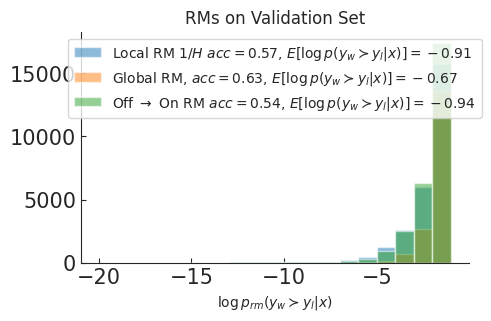

In [ ]:
setup_plot()
plt.hist(np.log(local_rm_H_odds), bins=np.arange(-20, 0), alpha=0.5, label=f'Local RM $1/H$ $acc={local_rm_H_acc.mean():.2f}$, $E[\\log p(y_w \succ y_l | x)]={np.log(local_rm_H_odds).mean():.2f}$')
plt.hist(np.log(global_rm_odds), bins=np.arange(-20, 0), alpha=0.5, label=f'Global RM, $acc={global_rm_acc.mean():.2f}$, $E[\\log p(y_w \succ y_l | x)]={np.log(global_rm_odds).mean():.2f}$')
# plt.hist(local_rm_odds, bins=20, alpha=0.5, label=f'Local RM $acc={local_rm_acc.mean():.2f}$')
# plt.hist(dpo_rm_odds, bins=20, alpha=0.5, label=f'DPO RM $acc={dpo_rm_acc.mean():.2f}$')
# plt.hist(last_rm_odds, bins=20, alpha=0.5, label=f'Last RM $acc={last_rm_acc.mean():.2f}$')
# plt.hist(prefix_rm_odds, bins=20, alpha=0.5, label=f'Prefix RM $acc={prefix_rm_acc.mean():.2f}$')
# plt.hist(dpo_rm_odds, bins=20, alpha=0.5, label=f'DPO RM $acc={dpo_rm_acc.mean():.2f}$')
# plt.hist(global_rm_odds[global_rm_acc == 0], bins=10, alpha=0.5, label='Global RM Incorrect')
# plt.hist(global_rm_odds[global_rm_acc == 1], bins=10, alpha=0.5, label='Global RM Correct')
# plt.hist(local_rm_odds[local_rm_acc == 0], bins=10, alpha=0.5, label='Local RM Incorrect')
# plt.hist(local_rm_odds[local_rm_acc == 1], bins=10, alpha=0.5, label='Local RM Correct')
plt.hist(np.log(off_on_20_rm_odds), bins=np.arange(-20, 0), alpha=0.5, label=f'Off $\\rightarrow$ On RM $acc={off_on_20_rm_acc.mean():.2f}$, $E[\\log p(y_w \succ y_l | x)]={np.log(off_on_20_rm_odds).mean():.2f}$')

plt.title("RMs on Validation Set")
plt.xlabel("$\\log p_{rm}(y_w \succ y_l | x)$")
plt.legend(loc='upper center', fontsize=10)
plt.show()

In [5]:
global_rm_gpt_acc = np.load("../../eval_tables/global_rm_gpt_eval/validation_acc.npy")
global_rm_gpt_odds = np.load("../../eval_tables/global_rm_gpt_eval/validation_odds.npy")

In [6]:
print("Global GPT", global_rm_gpt_acc.mean())


Global GPT 0.5854671775955306


In [7]:
print("Global GPT", global_rm_gpt_odds.mean())


Global GPT 0.6132608537173371


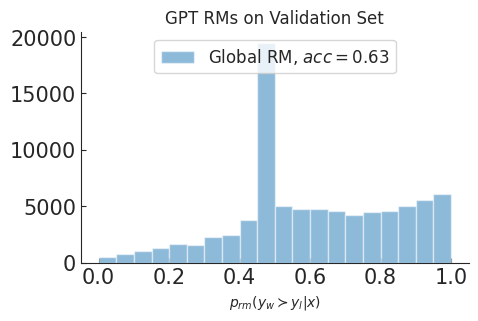

In [8]:
setup_plot()
plt.hist(global_rm_gpt_odds, bins=20, alpha=0.5, label=f'Global RM, $acc={global_rm_acc.mean():.2f}$')
# plt.hist(local_rm_odds, bins=20, alpha=0.5, label=f'Local RM $acc={local_rm_acc.mean():.2f}$')
# plt.hist(dpo_rm_odds, bins=20, alpha=0.5, label=f'DPO RM $acc={dpo_rm_acc.mean():.2f}$')
# plt.hist(last_rm_odds, bins=20, alpha=0.5, label=f'Last RM $acc={last_rm_acc.mean():.2f}$')
# plt.hist(prefix_rm_odds, bins=20, alpha=0.5, label=f'Prefix RM $acc={prefix_rm_acc.mean():.2f}$')
# plt.hist(dpo_rm_odds, bins=20, alpha=0.5, label=f'DPO RM $acc={dpo_rm_acc.mean():.2f}$')
# plt.hist(global_rm_odds[global_rm_acc == 0], bins=10, alpha=0.5, label='Global RM Incorrect')
# plt.hist(global_rm_odds[global_rm_acc == 1], bins=10, alpha=0.5, label='Global RM Correct')
# plt.hist(local_rm_odds[local_rm_acc == 0], bins=10, alpha=0.5, label='Local RM Incorrect')
# plt.hist(local_rm_odds[local_rm_acc == 1], bins=10, alpha=0.5, label='Local RM Correct')
plt.title("GPT RMs on Validation Set")
plt.xlabel("$p_{rm}(y_w \succ y_l | x)$")
plt.legend(loc='upper center', fontsize=12)
plt.show()